In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

from scipy.stats import chi2, norm

sys.path.append('..')
from higgs_inference import settings
from higgs_inference.various.utils import format_number, weighted_quantile

# Load training data

In [13]:
# Training data
r_train = np.load('../data/unweighted_events/r_train_new.npy')
y_train = np.load('../data/unweighted_events/y_train_new.npy')
rhat_train = np.load('../results/parameterized/r_train_combinedregression_deep_new.npy')
print(r_train.shape, r_train[:5])
print(rhat_train.shape, rhat_train[:5])

# Find events for thetas, generated according to theta1
indices_theta = [ [] for t in range(settings.n_thetas)]
t = 17
last = 0
for i, y in enumerate(y_train):
    if y == 1:
        indices_theta[t].append(i)
        last = 1
    elif last == 1: # Done with a theta
        #print('Event {}: done with theta {}, which has {} events'.format(
        #    i, t, len(indices_theta[t])))
        t += 1
        last = 0
        

(9999997,) [1.415  0.9155 0.859  1.456  1.142 ]
(9999997,) [0.5159526 0.9204905 1.0154433 1.2207853 1.4143654]


In [14]:
expected_r = np.zeros(settings.n_thetas)
expected_rhat = np.zeros(settings.n_thetas)
error = np.zeros(settings.n_thetas)
for t in range(settings.n_thetas):
    if len(indices_theta[t]) > 0:
        expected_r[t] = np.mean(r_train[indices_theta[t]])
        expected_rhat[t] = np.mean(rhat_train[indices_theta[t]])
        error[t] = np.mean(rhat_train[indices_theta[t]] / r_train[indices_theta[t]])
    else:
        expected_r[t] = np.nan
        expected_rhat[t] = np.nan
        error[t] = np.nan

# Plot over theta

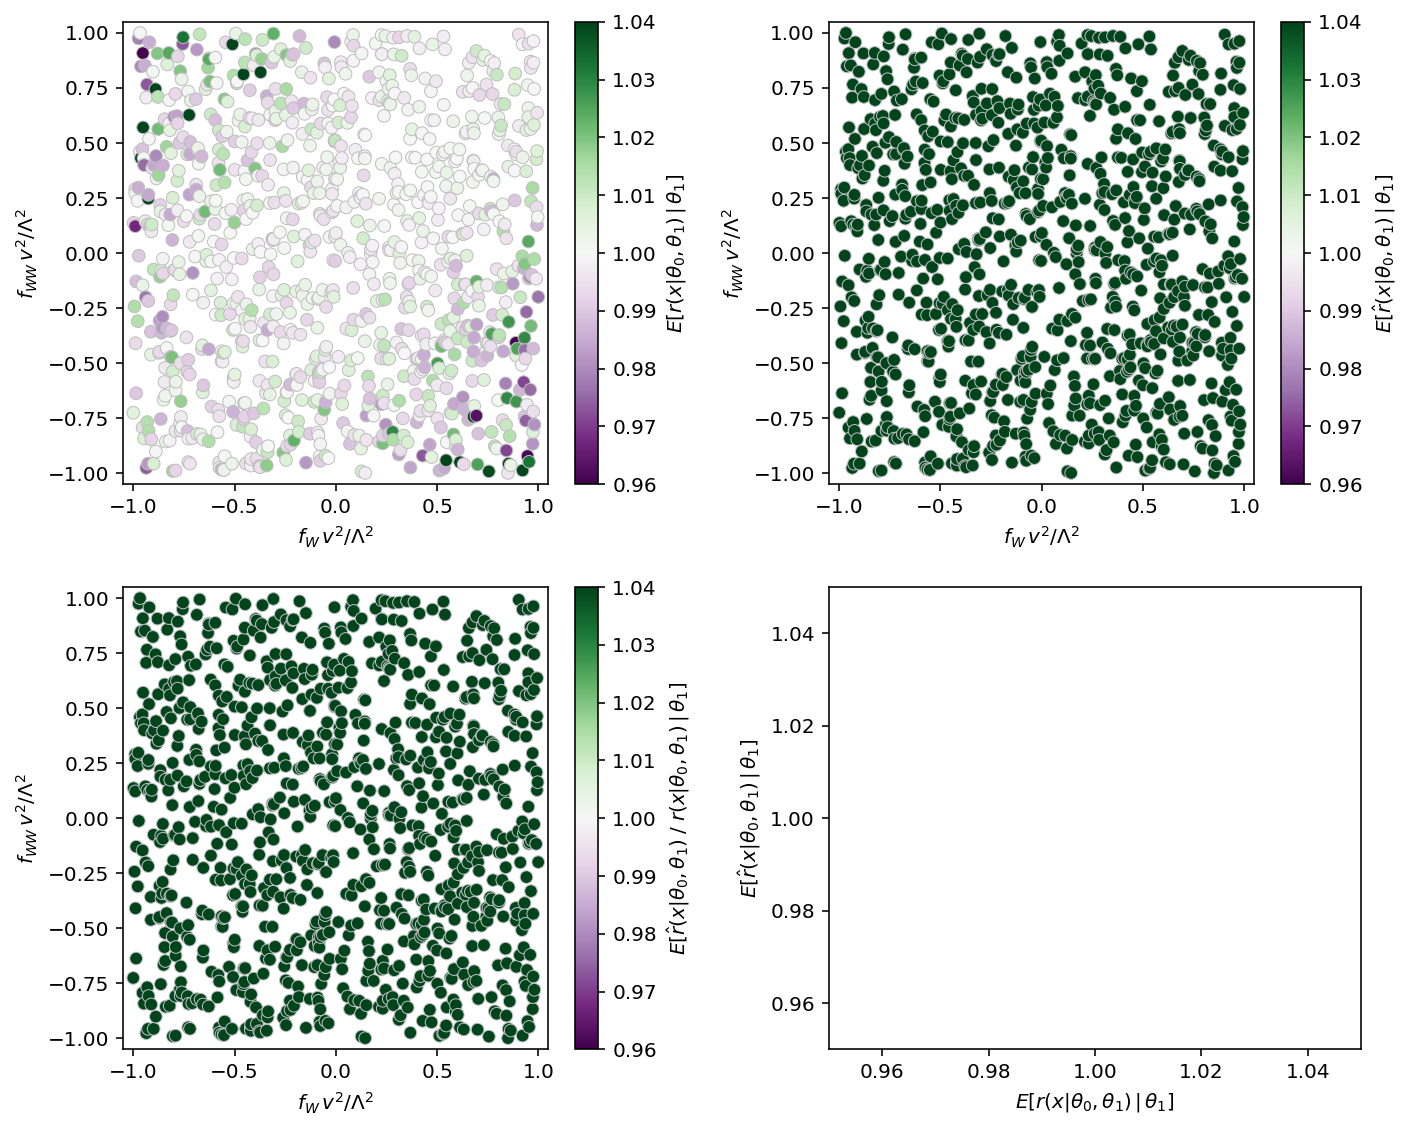

In [15]:
plt.figure(figsize=(10,8))



plt.subplot(2,2,1)

plt.scatter(settings.thetas[:,0], settings.thetas[:,1], c=expected_r,
            s=40.,
            edgecolor='0.75', lw=0.5,
            cmap='PRGn',
            vmin=0.96, vmax=1.04)

cbar = plt.colorbar()

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'$E[r(x | \theta_0, \theta_1) \,|\, \theta_1]$')



plt.subplot(2,2,2)

plt.scatter(settings.thetas[:,0], settings.thetas[:,1], c=expected_rhat,
            s=40.,
            edgecolor='0.75', lw=0.5,
            cmap='PRGn',
            vmin=0.96, vmax=1.04)

cbar = plt.colorbar()

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'$E[\hat{r}(x | \theta_0, \theta_1) \,|\, \theta_1]$')



plt.subplot(2,2,3)

plt.scatter(settings.thetas[:,0], settings.thetas[:,1], c=error,
            s=40.,
            edgecolor='0.75', lw=0.5,
            cmap='PRGn',
            vmin=0.96, vmax=1.04)

cbar = plt.colorbar()

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'$E[\hat{r}(x | \theta_0, \theta_1) \; / \; r(x | \theta_0, \theta_1) \,|\, \theta_1]$')



plt.subplot(2,2,4)

plt.scatter(expected_r, expected_rhat,
            s=40., 
            c='C0', lw=0.)

plt.xlim(0.95,1.05)
plt.ylim(0.95,1.05)
plt.xlabel(r"$E[r(x | \theta_0, \theta_1) \,|\, \theta_1]$")
plt.ylabel(r"$E[\hat{r}(x | \theta_0, \theta_1) \,|\, \theta_1]$")




plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


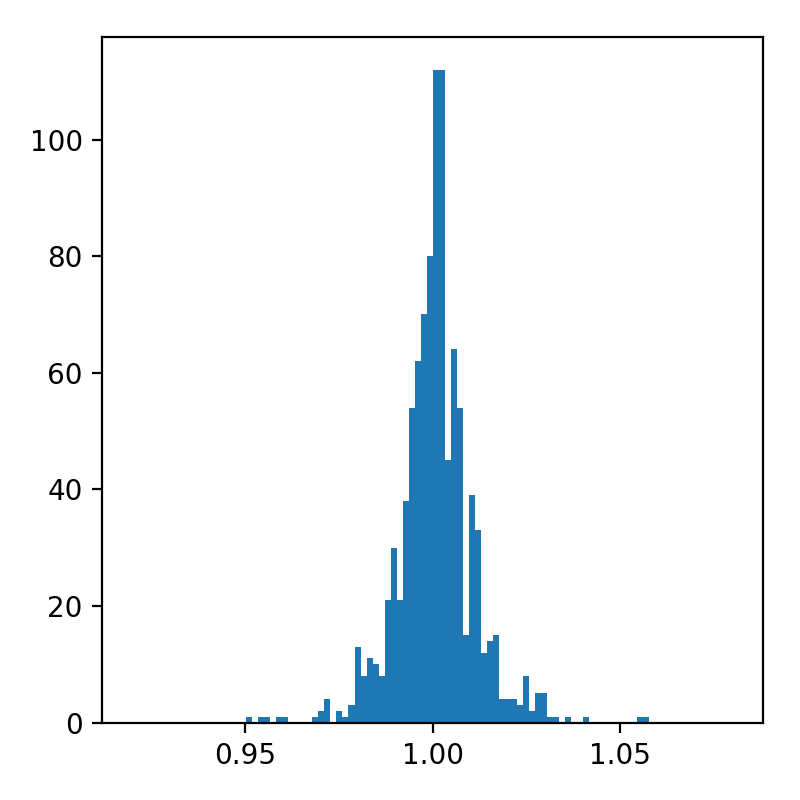

1.000662109375


/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [35]:
plt.figure(figsize=(4,4))
plt.hist(expected_r, bins=100, range=(0.92,1.08))
plt.tight_layout()
plt.show()
print(np.nanmean(expected_r))